# Análisis No Supervisado de Clasificación

## Dataset de Información Personal

Dicho dataset es una muestra que contiene información/caracteristicas de unos 2mil clientes.
En el presente proyecto haremos una clusterización de clientes para en un futuro poder aplicarles diferentes estrategias según al cluster que pertenezcan.

## Análisis Exploratorio de los Datos

In [202]:
import pandas as pd#Libreria para manejar la base de datos
import numpy as np#En caso de necesitar trabajar con algebra o transformar df a arrays
import matplotlib.pyplot as plt#Creación y modificación de gráficos
import random#Generar una semilla aleatoria para poder replicar el proyecto

In [154]:
df = pd.read_csv(r"C:\Users\Nahuel\Desktop\DataSets a Estudiar\Customer Clustering\segmentation data.csv")#Cargamos la base
random.seed(21)#Escogemos una semilla

In [155]:
df.head()#Vemos que contamos con un identificador unico para cada cliente (ID), además de su sexo, estado civil, edad, educación,
#ingresos, ocupación y el tamaño de la ciudad en la que viven.

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


Cabe aclarar lo siguiente:
* ID: identificador único
* Sex: 1 si es mujer, 0 si es hombre
* Marital Status: 1 si es divorciado/separado/casado/viudo, 0 si es soltero
* Education: 0 si es otro o desconocido, 1 si tiene secundaria, 2 si es universitario, 3 si es recibido, posee postgrados, etc.
* Income: Salario anual en dólares
* Occupation: su ocupacion, 0 si es desempleado o no clasificado, 1 si tiene empleo o tiene estudios, 2  si directivo / autónomo / empleado altamente cualificado / funcionario
* Settlement Size: 0 si es una ciudad pequeña, 1 si es una ciudad mediana, 3 si es una ciudad grande

In [156]:
df.describe()#Computamos para observar rapidamente las variables, vemos que no hay NaN's, podemos observar los promedios, parece ser que
#la muestra de clientes son mayormente clientes "medianos", que tienen ingresos normales, y viven en ciudades pequeñas a medianas,
#El promedio de edad esta en 36 años aproximadamente, y en cantidad de personas por sexo estan casi igual repartidas.

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


Text(0.5, 1.0, 'Frecuencia de la Edad')

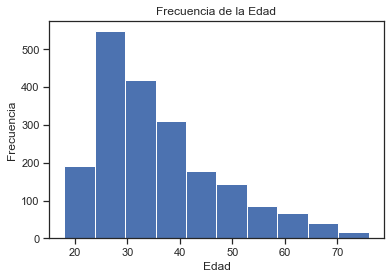

In [157]:
plt.hist(df["Age"])#Podemos observar que lo mas frecuente es que tengan entre 25 y 40 años.
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de la Edad")

Text(0.5, 1.0, 'Frecuencia de Ingreso')

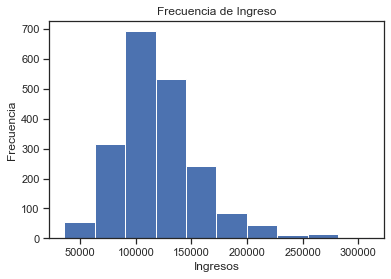

In [158]:
plt.hist(df["Income"])#Podemos notar que se comporta como una normal, 
#la mayor frecuencia de ingresos ronda los $100.000 USD anuales
plt.xlabel("Ingresos")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de Ingreso")

Text(0.5, 1.0, 'Boxplot de las Edades')

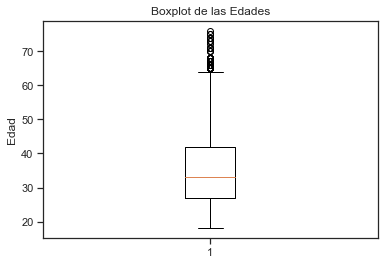

In [159]:
plt.boxplot(df["Age"])
plt.ylabel("Edad")
plt.title("Boxplot de las Edades")
#Podemos observar que la parte de quantiles dentro de Age en describe realmente se cumple
#Lo que tambien podemos notar es que poseemos una gran cantidad de outliers.

In [160]:
df = df.drop(["ID"], axis=1)#Sacamos la columna ID ya que para este analisis no nos hará falta

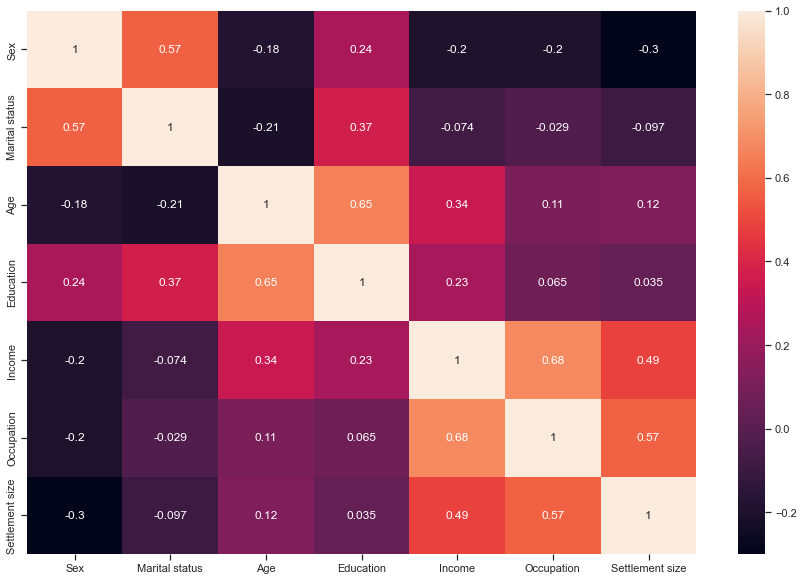

In [161]:
import seaborn as sns#Libreria para creacion de mapas a color
sns.set(style = "ticks", color_codes=True)
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

Con este grafico de correlación podemos entender mucho mejor la relación entre las variables:
* Income: podemos notar que hay una fuerte correlación entre el ingreso con el lugar donde viven y la ocupacion, esto tiene sentido si pensamos que alguien que vive en una ciudad cada vez mas grande, necesariamente tiene que ganar más para costear su estilo de vida y a la vez necesita tener empleo. A su vez tambien podee una correlación más baja con educacion y edad, esto puede justificar el hecho que más edad y educación significa más experiencia.

* La edad esta sorpresivamente vinculada con la educación, esto podria traducirse en que nuestros clientes son personas que pasan su vida estudiando y queriendo aprender cada vez más.

* Tambien esta fuertemente vinculado el género con el estado civil, pareciera ser que las mujeres son más propensas a estar casadas que los hombres.

Podriamos hacer un grafico de dispersion para observar más gráficamente aún la relacion entre edad e ingresos.

Text(0.5, 1.0, 'Ingresos en funcion de Edad')

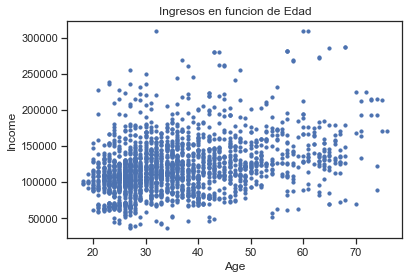

In [162]:
plt.scatter(df["Age"], df["Income"], s = 10)
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Ingresos en funcion de Edad")

Podemos observar como hay una pequeña tendencia, pero no es tan fuerte, tiene sentido por su grado de correlación.

## Clustering

### Implementación de Machine Learning
Luego de haber analizado los datos, identificar tendencias, saber como se componen y que representan, pasaremos a separar a nuestros clientes en grupos.
Como no tenemos una K definida, es decir una cantidad predefinida de clusters óptimos , prodecederemos a utilizar un par de metodos para hallar dicha cantidad.
Además de esto antes de empezar a implementar los modelos de machine learning, standarizaremos el dataset para posteriormente implementar PCA, con el fin de poder ver visualmente la implementación de clusters.

### ACP y Standarización

In [163]:
from sklearn.preprocessing import StandardScaler#Paquete para standarizar
from sklearn.decomposition import PCA#Paquete para PCA

In [164]:
df_std = StandardScaler().fit_transform(df)#Standarizamos

In [165]:
df_std

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

In [166]:
pca = PCA()
pca.fit(df_std)#La idea de este punto es observar cual es el minimo recomendado de dimensiones.
#Es decir cual es la cantidad mínima que al menos explica un 80% de la varianza

PCA()

In [167]:
var_exp = pca.explained_variance_ratio_#El aumento de varianza explicativa por cada
#dimensión extra
var_exp

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0.5, 1.0, 'Varianza Explicada Según Número de Componentes')

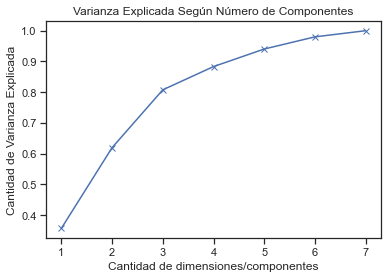

In [168]:
plt.plot(range(1, len(df.columns.values)+1), var_exp.cumsum(), "bx-")
plt.xlabel("Cantidad de dimensiones/componentes")
plt.ylabel("Cantidad de Varianza Explicada")
plt.title("Varianza Explicada Según Número de Componentes")

Partiendo de la regla general de almenos conservar un 80% de la variables explicativa, podemos comprimir las variables hasta un mínimo de 3 componentes.

In [169]:
#Una vez elegida la cantidad de componentes, ya podemos crear nuestro nuevo dataframe a trabajar.
new = PCA(n_components=3).fit_transform(df_std)
new

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [170]:
new = pd.DataFrame(new)


### Hallar Cantidad Óptima de K

Como no tenemos una cantidad predicha de K lo que haremos sera por medio de dos técnicas encontrar una cantidad ideal.

#### Metodo del codo/aceleración

Dicho metodo consiste en evaluar visualmente cuando es que "quiebra" la recta.
En palabras más técnicas cada tramo de la recta es la varianza que hay dependiendo la cantidad de clusters que halla, a partir de cierto tramo el aumento de clusters practicamente no la hace disminuir.

In [171]:
from sklearn.cluster import KMeans#Paquete para implementar KMeans.
from scipy.spatial.distance import cdist#Paquete para calcular la distancia entre dos puntos.

In [172]:
#Lo que haremos será ir aumentando los numeros de clusters en un bucle hasta que hallemos una cantidad optima
max_k = 10 #maximo numero de clusters que vamos a crear
K = range(1,max_k + 1)#Vamos a crear un solo cluster en principio
ssw = []
for k in K:
    
    kmeanModel = KMeans(n_clusters = k).fit(new)
    centers = pd.DataFrame(kmeanModel.cluster_centers_)
    labels = kmeanModel.labels_
    ssw_k = sum(np.min(cdist(new, kmeanModel.cluster_centers_, "euclidean"), axis = 1))
    ssw.append(ssw_k)

C:\Users\Nahuel\anaconda3\envs\Tranajo\lib\site-packages\sklearn\cluster\_kmeans.py:1040: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  "KMeans is known to have a memory leak on Windows "


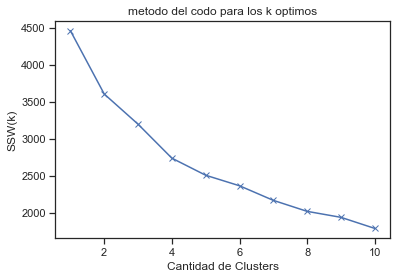

In [173]:
plt.plot(K, ssw, "bx-")
plt.title("metodo del codo para los k optimos")
plt.xlabel("Cantidad de Clusters")
plt.ylabel("SSW(k)")
plt.show()
#Vemos que a partir del punto 4, los tramos "entre clusters" son practicamente de igual tamaño

Según la tecnica del codo pareciera el numero óptimo de cluster es 4.

#### Metodo del codo/aceleración 2

Otra manera de hacer el metodo del codo:

In [174]:
from scipy.cluster.hierarchy import dendrogram, linkage#Esta vez usamos dendrograma y linkage para calcular
#Linkage se encargar de las distancias 
#Dendrograma se clusterizar

In [175]:
Z = linkage(new, "ward", metric="euclidean")

In [176]:
last = Z[-10:,2]
last_rev = last[::-1]
last_rev

array([76.41327421, 68.65546165, 50.47554252, 33.71813673, 31.6739653 ,
       30.20810191, 28.63179594, 26.25707981, 23.01376825, 21.51834385])

In [177]:
idx = np.arange(1, len(last)+1)
idx

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [178]:
acc = np.diff(last_rev, 2)
acc

array([-10.42210658,   1.42251334,  14.71323436,   0.57830805,
        -0.11044258,  -0.79841016,  -0.86859543,   1.74788716])

El numero óptimo de clusters es 4


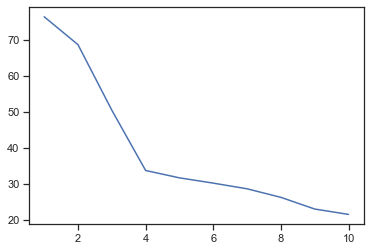

In [179]:
plt.plot(idx, last_rev)
k = acc.argmax() +2
print ("El numero óptimo de clusters es %s" %str(k))

#### Técnica de la silueta

Otra forma de calcular el número óptimo es por medio de la técnica de la silueta.
Su función es indicar que tan lejos estan los puntos de un cluster A del cluster vecino B.
Mientras más cerca de 1 mejor.

C:\Users\Nahuel\anaconda3\envs\Tranajo\lib\site-packages\sklearn\cluster\_kmeans.py:1040: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  "KMeans is known to have a memory leak on Windows "


Para K = 2 el promedio de silueta es de : 0.31201702459568664
     - Para i = 1   la silueta del cluster vale:  0.27340509982274186
     - Para i = 2   la silueta del cluster vale:  0.34120479213695565
Para K = 3 el promedio de silueta es de : 0.34007202947451254
     - Para i = 1   la silueta del cluster vale:  0.3353530007106313
     - Para i = 2   la silueta del cluster vale:  0.3765463087909472
     - Para i = 3   la silueta del cluster vale:  0.2636243976237713
Para K = 4 el promedio de silueta es de : 0.34727369567476046
     - Para i = 1   la silueta del cluster vale:  0.23085777841034216
     - Para i = 2   la silueta del cluster vale:  0.29653844692345466
     - Para i = 3   la silueta del cluster vale:  0.4256186063558461
     - Para i = 4   la silueta del cluster vale:  0.3472286773374711
Para K = 5 el promedio de silueta es de : 0.3435716080077209
     - Para i = 1   la silueta del cluster vale:  0.3200856701399406
     - Para i = 2   la silueta del cluster vale:  0.3544192

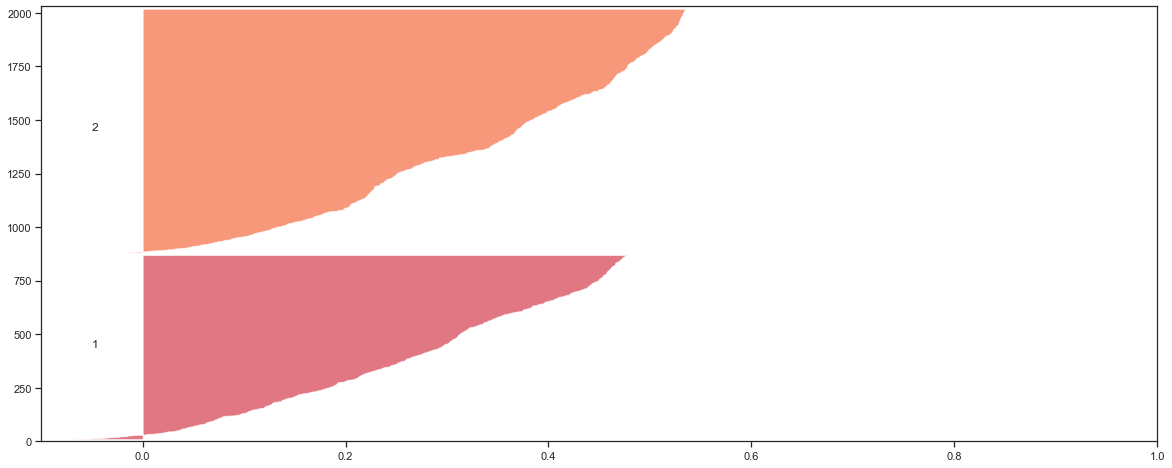

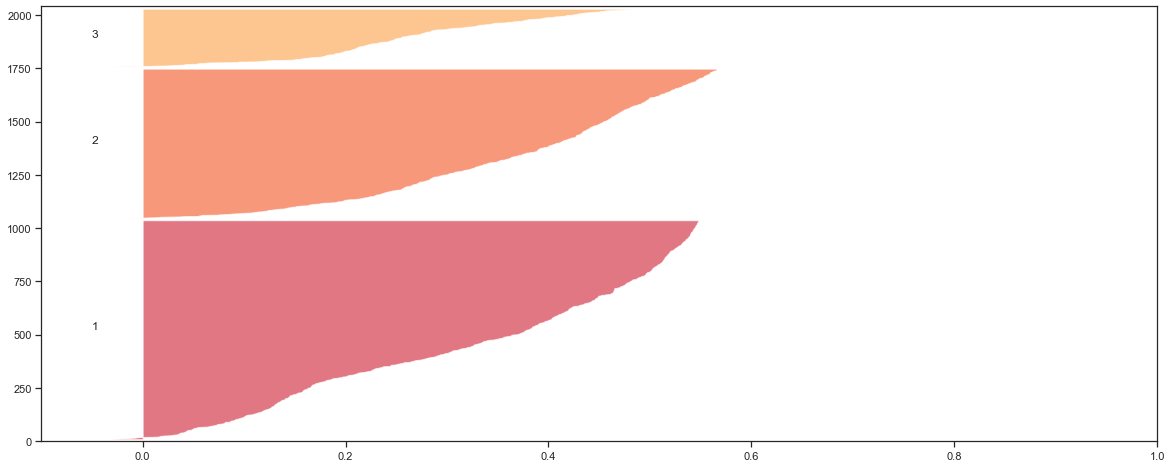

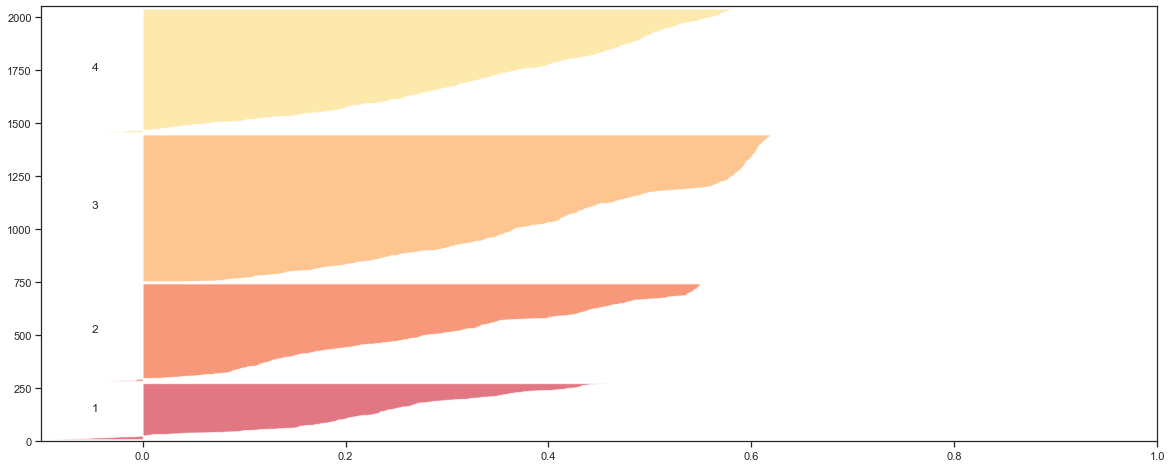

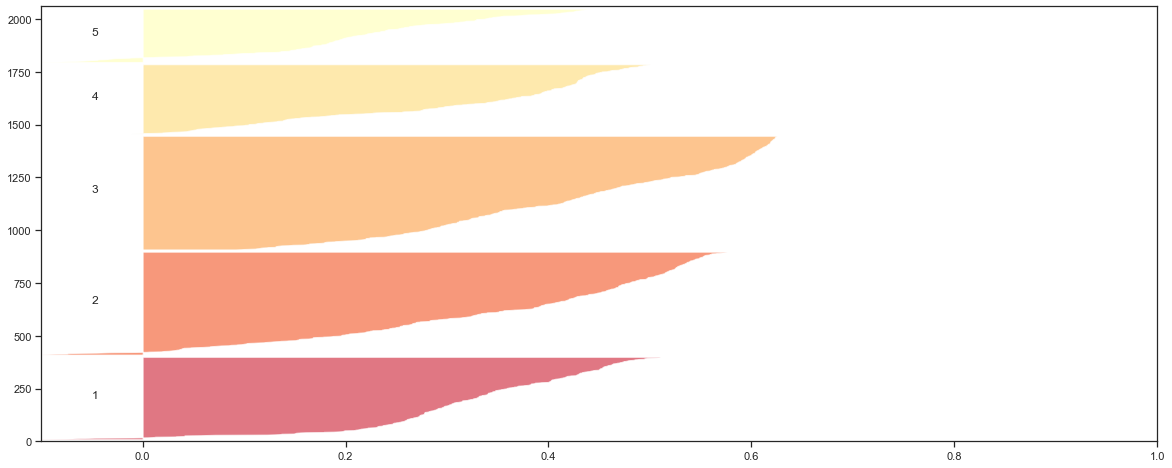

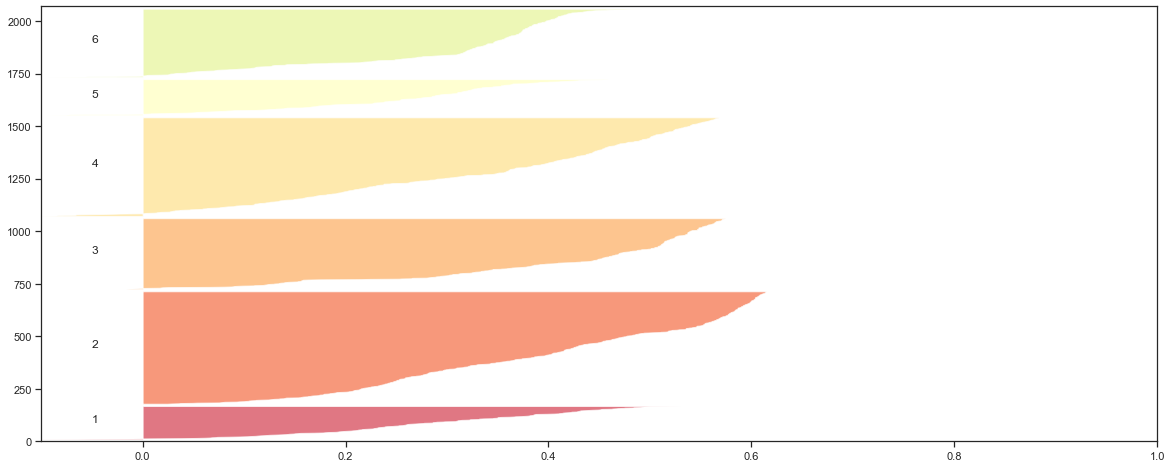

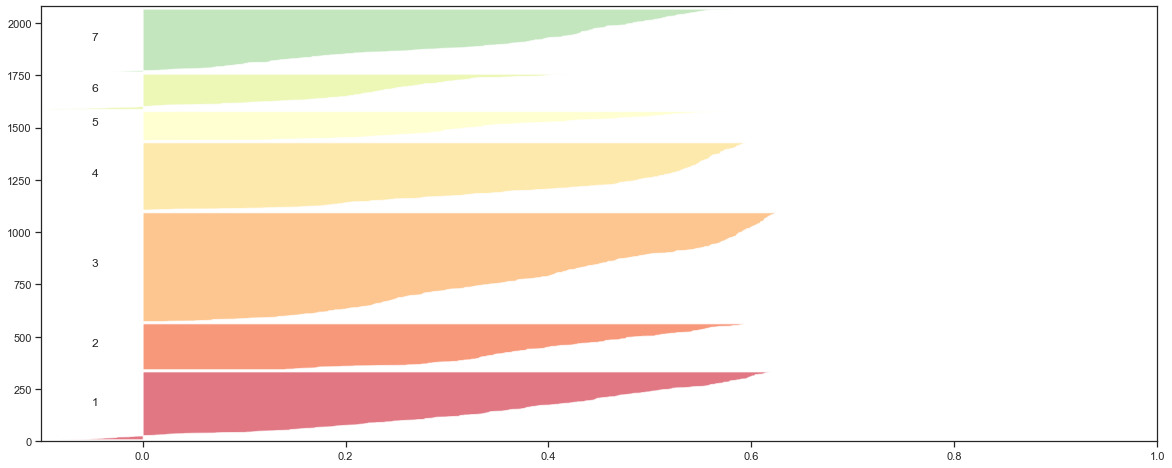

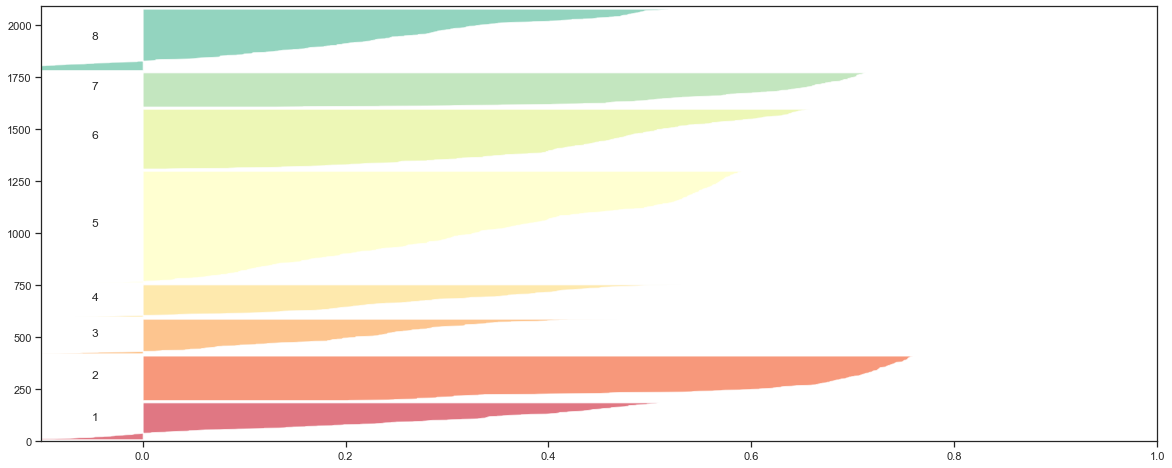

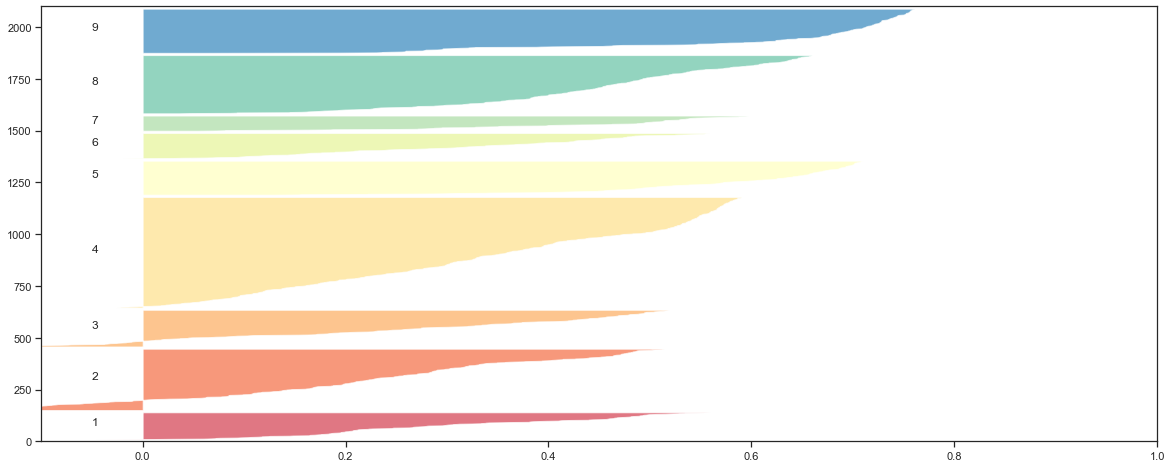

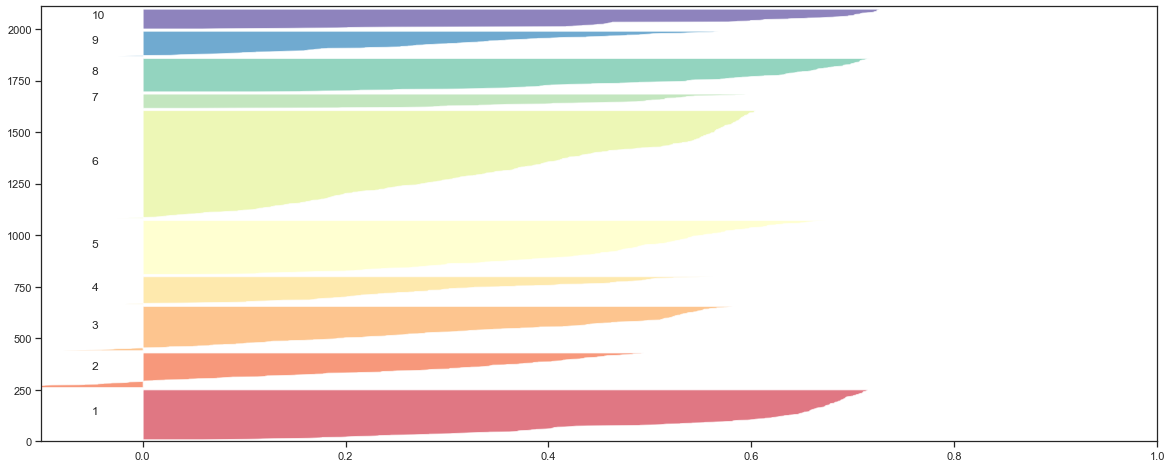

In [180]:
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score#Paquetes para saber los valores de las siluetas.

max_k = 10 #maximo numero de clusters que vamos a crear
K = range(1,max_k + 1)#Vamos a crear un solo cluster en principio
ssw = [] #Suma de los cuadrados internos
color_palette = [plt.cm.Spectral(float(i)/max_k) for i in K] #El color para los clusters
centroid = [new.sum()/len(new) for i in K] 
sst = sum(np.min(cdist(new, centroid, "euclidean"), axis =1))

for k in K:
    
    kmeanModel = KMeans(n_clusters = k).fit(new)
    centers = pd.DataFrame(kmeanModel.cluster_centers_)
    labels = kmeanModel.labels_
    ssw_k = sum(np.min(cdist(new, kmeanModel.cluster_centers_, "euclidean"), axis = 1))
    ssw.append(ssw_k)
    label_color = [color_palette[i] for i in labels]
    
    #Fabricamos la silueta para cada cluster, solo no podemos crear silueta cuando k=1 o k=len(x)
    if 1<k<len(new):
        fig, axis1 = plt.subplots(1)
        fig.set_size_inches(20,8)
        
        #El primer subplot contendra la silueta, puede tener valores de -1 a 1
        #En nuestro caso ya controlamos que los valores estan en -0.1 y 1
        
        axis1.set_xlim([-0.1,1.0])
        
        #El numero de clusters a insertar determinara el tamaño de cada barra
        #El coeficiente (n_clusters +1 )*10 sera el espacio en blanco que dejaremos entre siluetas individuales
        #De cada cluster para separarlas
        axis1.set_ylim([0, len(new) + (k+1)*10])
        
        silhouette_avg = silhouette_score(new, labels)
        print("Para K =",k, "el promedio de silueta es de :", silhouette_avg)
        sample_silhouette_values = silhouette_samples(new, labels)
        
        y_lower = 10
        for i in range(k):
            #Agregamos la silueta del cluster k-esimo
            kth_cluster_sv = sample_silhouette_values[labels == i]
            print("     - Para i =", i+1, "  la silueta del cluster vale: " , np.mean(kth_cluster_sv))
            #Ordenamos descendientemente las siluetas del cluester k-esimo
            kth_cluster_sv.sort()
            
            #Calculamos donde color la primera silueta en el eje vertical
            kth_cluster_size = kth_cluster_sv.shape[0]
            y_upper = y_lower + kth_cluster_size
            
            #Elegimos el color del cluster
            color = color_palette[i]
            
            #Pintamos la silueta del cluster k-esimo
            axis1.fill_betweenx(np.arange(y_lower, y_upper), 0, kth_cluster_sv, facecolor = color, alpha = 0.7)
            
            #Etiquetamos dicho cluster con el numero en el centro
            axis1.text(-0.05, y_lower + 0.5* kth_cluster_size, str(i+1))
            
            #Calculamos el nuevo y_lower para el siguiente cluster del grafico
            y_lower = y_upper + 10 #Dejamos vacias 10 posiciones sin muestra
        
        #Fin de la representacion de la silueta

Segun la técnica de la silueta en KMeans el número optimo de clusters es 3.

#### Cantidad elegida
Nos basaremos en la cantidad óptima dada por el método del codo para continuar con el proyecto.

### KMeans
KMeans se encarga de ubicar centroides que reduzcan la suma de la distancia al cuadrado con cada miembro de su cluster.
Es decir, posiciona los centroides de manera estratégica.

In [181]:
Km = KMeans(n_clusters = 4, random_state=21)#Creamos el modelo con 4 centroides
Km.fit(new)#Entrenamos

KMeans(n_clusters=4, random_state=21)

In [182]:
#Podemos obtener las etiquetas.
labelsk = pd.Series(Km.labels_)
labelsk

0       3
1       0
2       2
3       1
4       1
       ..
1995    2
1996    0
1997    2
1998    0
1999    2
Length: 2000, dtype: int32

In [183]:
Km.cluster_centers_#Donde estan ubicados los centroides.

array([[-1.10701947,  0.70377606, -0.78140962],
       [ 1.37266298, -1.0461718 , -0.24804623],
       [-1.04640645, -0.90296279,  1.0036436 ],
       [ 1.68732803,  2.03120004,  0.84403905]])

In [184]:
df["KMeans"] = labelsk
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,KMeans
0,0,0,67,2,124670,1,2,3
1,1,1,22,1,150773,1,2,0
2,0,0,49,1,89210,0,0,2
3,0,0,45,1,171565,1,1,1
4,0,0,53,1,149031,1,1,1


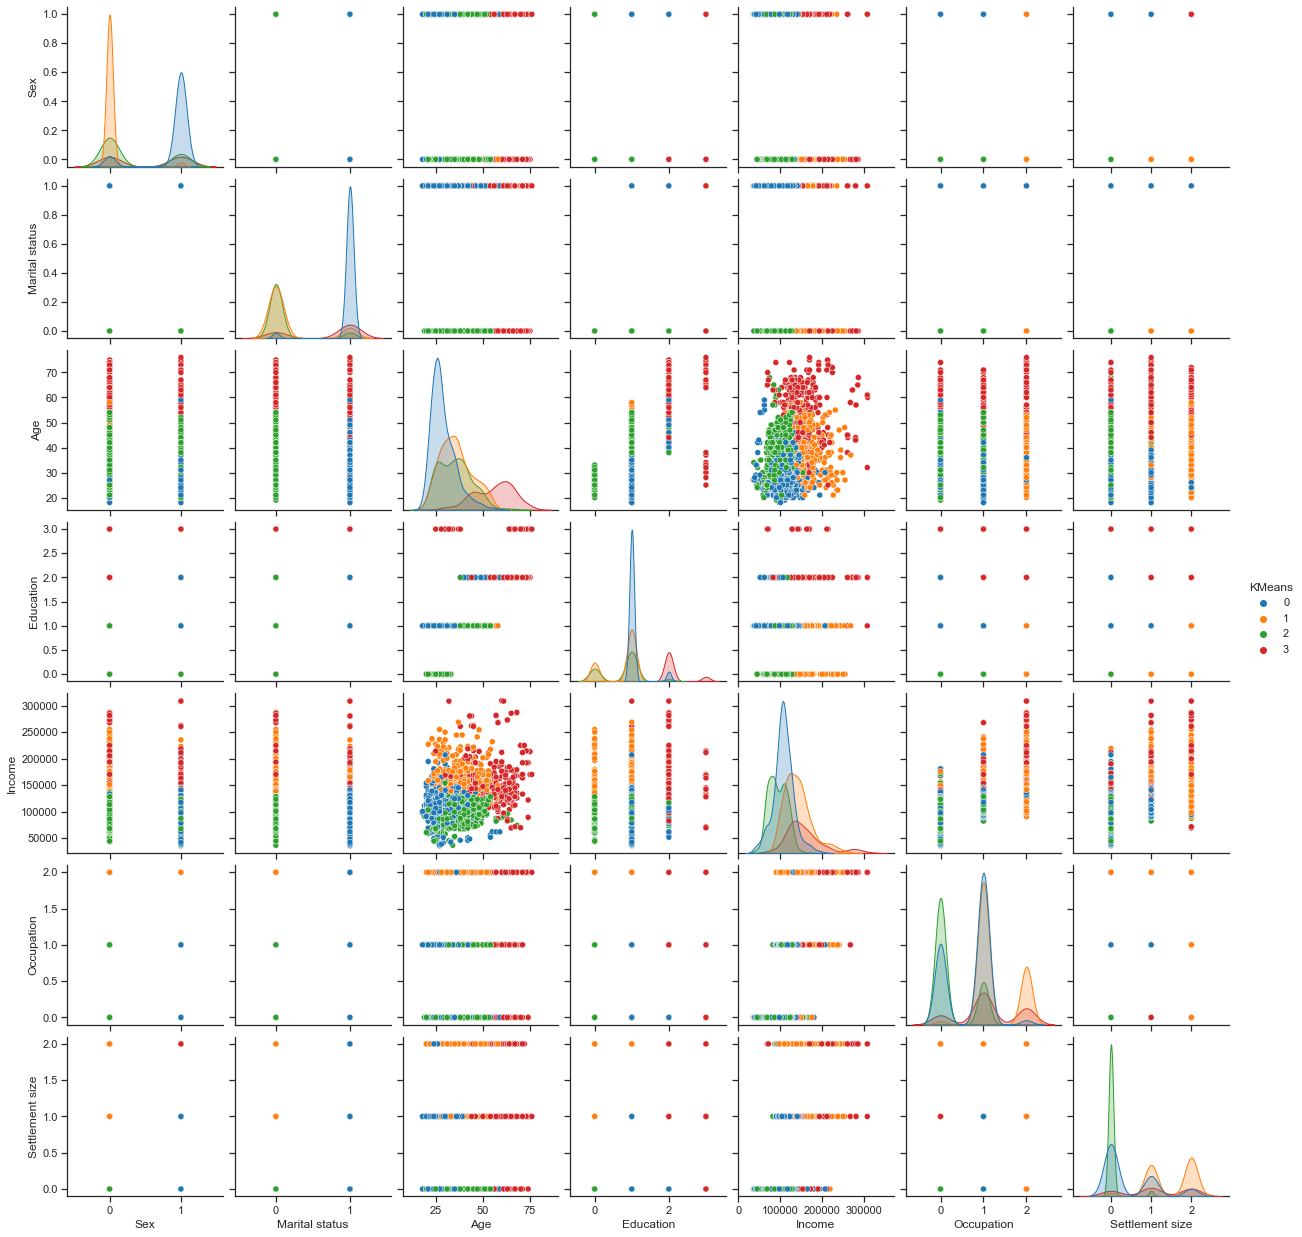

In [185]:
#Podriamos comparar como se comportan los distintos clusters.
sns.pairplot(df, hue = "KMeans", palette= "tab10")

### Kmedoides
Kmeoides funciona de manera similar a KMeans, solo con la diferencia que los centroides de KMedoides son un punto del dataset.


In [186]:
from pyclust import KMedoids#Libreria para implementar KMedoides

In [187]:
#Implementacion y entrenamiento del modelo.
kmed = KMedoids(n_clusters=4)
labelskm = kmed.fit_predict(np.array(new))
labelskm

array([1, 2, 3, ..., 3, 3, 3], dtype=int64)

In [188]:
df["KMedoids"] = labelskm
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,KMeans,KMedoids
0,0,0,67,2,124670,1,2,3,1
1,1,1,22,1,150773,1,2,0,2
2,0,0,49,1,89210,0,0,2,3
3,0,0,45,1,171565,1,1,1,0
4,0,0,53,1,149031,1,1,1,0


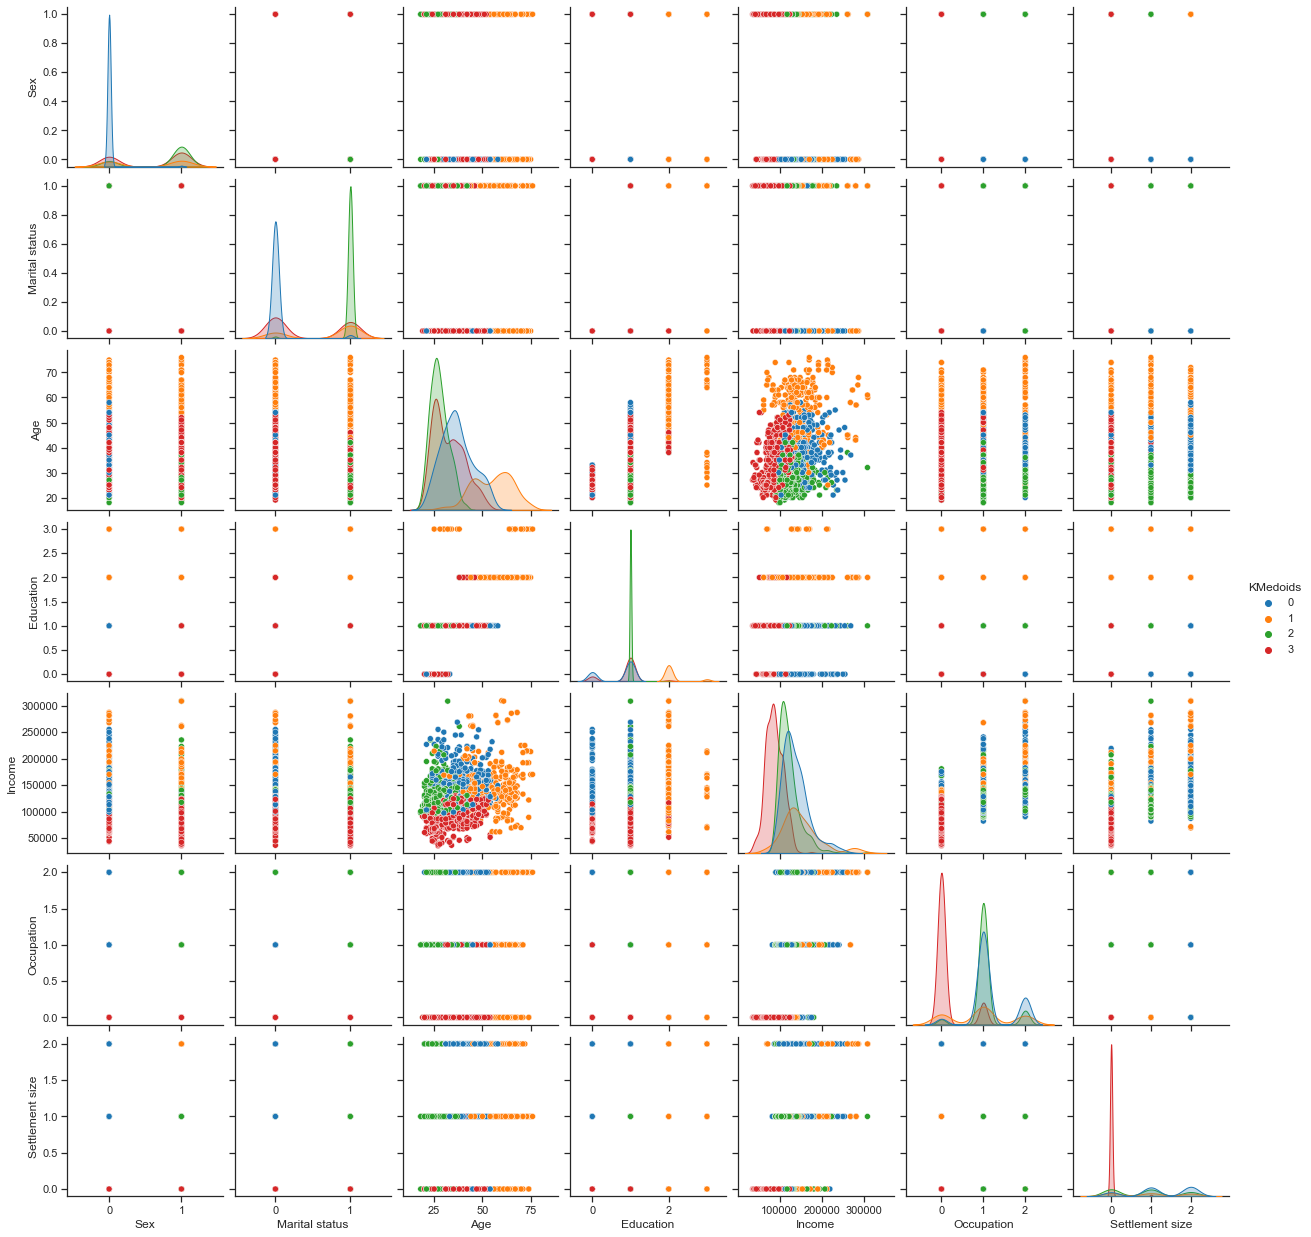

In [189]:
#Podemos observar el comportamiento entre los usuarios de los diferentes clusters.
sns.pairplot(df.drop(["KMeans"],axis=1), hue = "KMedoids", palette= "tab10")

### Dendrograma/Aglomerativo
El clustering aglomerativo se basa en ir agrupando los puntos que esten más cerca hasta que alfinal solo quede un cluster enorme que integre todos los demás clusters.

In [190]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster#Librerias a utilizar.

In [191]:
Z = linkage(new, "ward", metric = "euclidean")#Calculamos las distancias.

In [192]:
labelsd = fcluster(Z, 4, criterion ="maxclust")#Y agrupamos, en este caso seleccionamos que haya un máximo de 4 clusters.

In [193]:
#Una funcion que se encarga de mejorar la visualización del dendrograma.
def dendrogram_tune(*args, **kwargs):
    from scipy.cluster.hierarchy import dendrogram
    max_d = kwargs.pop("max_d", None)
    if max_d and "color_threshold" not in kwargs:
        kwargs["color_threshold"] = max_d
    annotate_above = kwargs.pop("annotate_above", 0)
    ddata = dendrogram (*args, **kwargs)
    if not kwargs.get("no_plot", False):
        plt.title("Clustering Jerarquico con Dendrograma Truncado")
        plt.xlabel("Indice de DataSet (o tamaño del cluster)")
        plt.ylabel("Distancia")
        for i, d, c in zip(ddata["icoord"], ddata["dcoord"], ddata["color_list"]):
            x = 0.5 * sum (i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x,y,"o", c=c)
                plt.annotate("%.3g"%y, (x,y), xytext=(0,-5), textcoords = "offset points", va="top", ha="center")
    if max_d:
        plt.axhline(y=max_d, c="k")
    
    return ddata

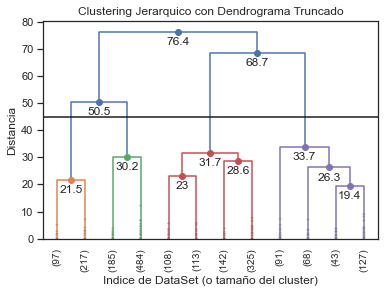

In [194]:
#Aplicamos la función
dendrogram_tune(Z, truncate_mode="lastp", p=12, leaf_rotation=90., leaf_font_size = 10., show_contracted=True, annotate_above = 12, max_d = 45)
plt.show()
#Podemos obsrvaer como serían esos 4 clusters.

In [195]:
labelsd

array([4, 2, 1, ..., 1, 2, 1], dtype=int32)

In [196]:
df["Dendrogram"] = labelsd -1#a las etiquetas les restamos 1 para que queden de 0-3 como las demás.

In [197]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,KMeans,KMedoids,Dendrogram
0,0,0,67,2,124670,1,2,3,1,3
1,1,1,22,1,150773,1,2,0,2,1
2,0,0,49,1,89210,0,0,2,3,0
3,0,0,45,1,171565,1,1,1,0,2
4,0,0,53,1,149031,1,1,1,0,2


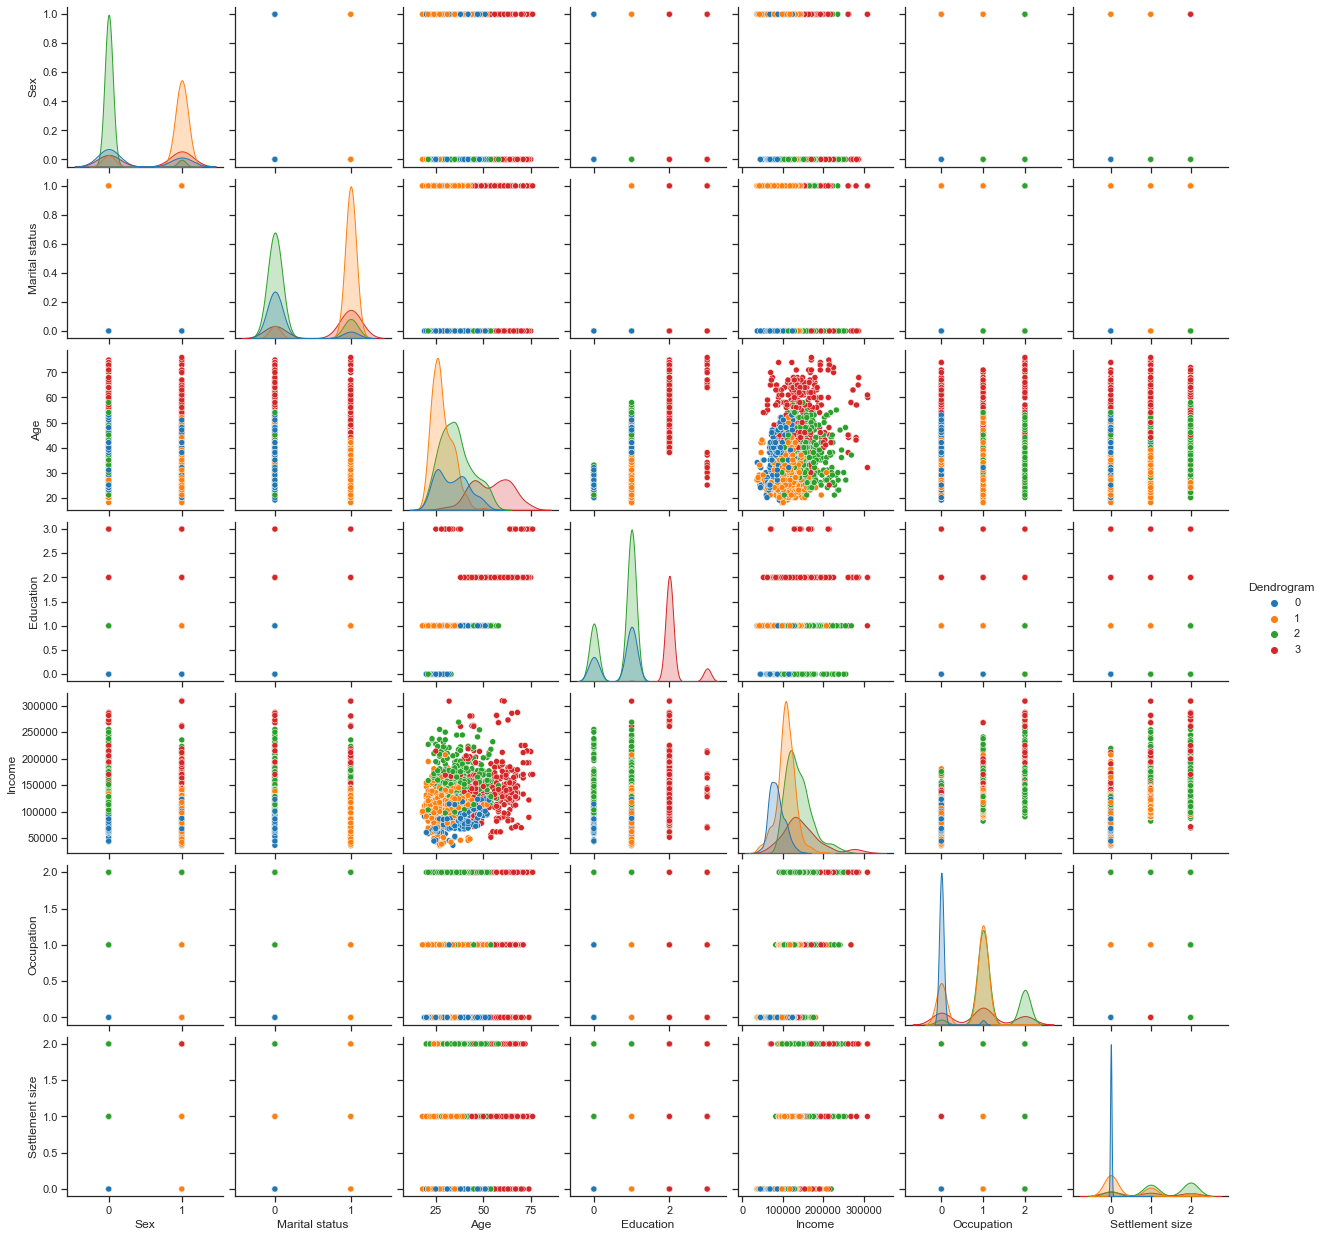

In [198]:
sns.pairplot(df.drop(["KMeans","KMedoids"], axis=1), hue = "Dendrogram", palette= "tab10")

## Visualizando modelos
Para finalizar el presente proyecto veremos como quedo el dataset final y además una pequeña demostración gráfica de como quedaron segmentados los clusters según cada modelo.

In [199]:
new.columns = ["componente_A", "componente_B", "componente_C"]#Los componentes con los que computamos los clusters.
new.head()

,componente_A,componente_B,componente_C
0,2.514746,0.834122,2.174806
1,0.344935,0.598146,-2.211603
2,-0.651063,-0.680093,2.280419
3,1.714316,-0.579927,0.730731
4,1.626745,-0.440496,1.244909


In [200]:
df_full = pd.merge(left = df, right= new, how="outer", left_index = True, right_index = True)
df_full.head()#El dataframe final.

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,KMeans,KMedoids,Dendrogram,componente_A,componente_B,componente_C
0,0,0,67,2,124670,1,2,3,1,3,2.514746,0.834122,2.174806
1,1,1,22,1,150773,1,2,0,2,1,0.344935,0.598146,-2.211603
2,0,0,49,1,89210,0,0,2,3,0,-0.651063,-0.680093,2.280419
3,0,0,45,1,171565,1,1,1,0,2,1.714316,-0.579927,0.730731
4,0,0,53,1,149031,1,1,1,0,2,1.626745,-0.440496,1.244909


Text(0.5, 1.0, 'Clustering con Dendrogram en Income(Age)')

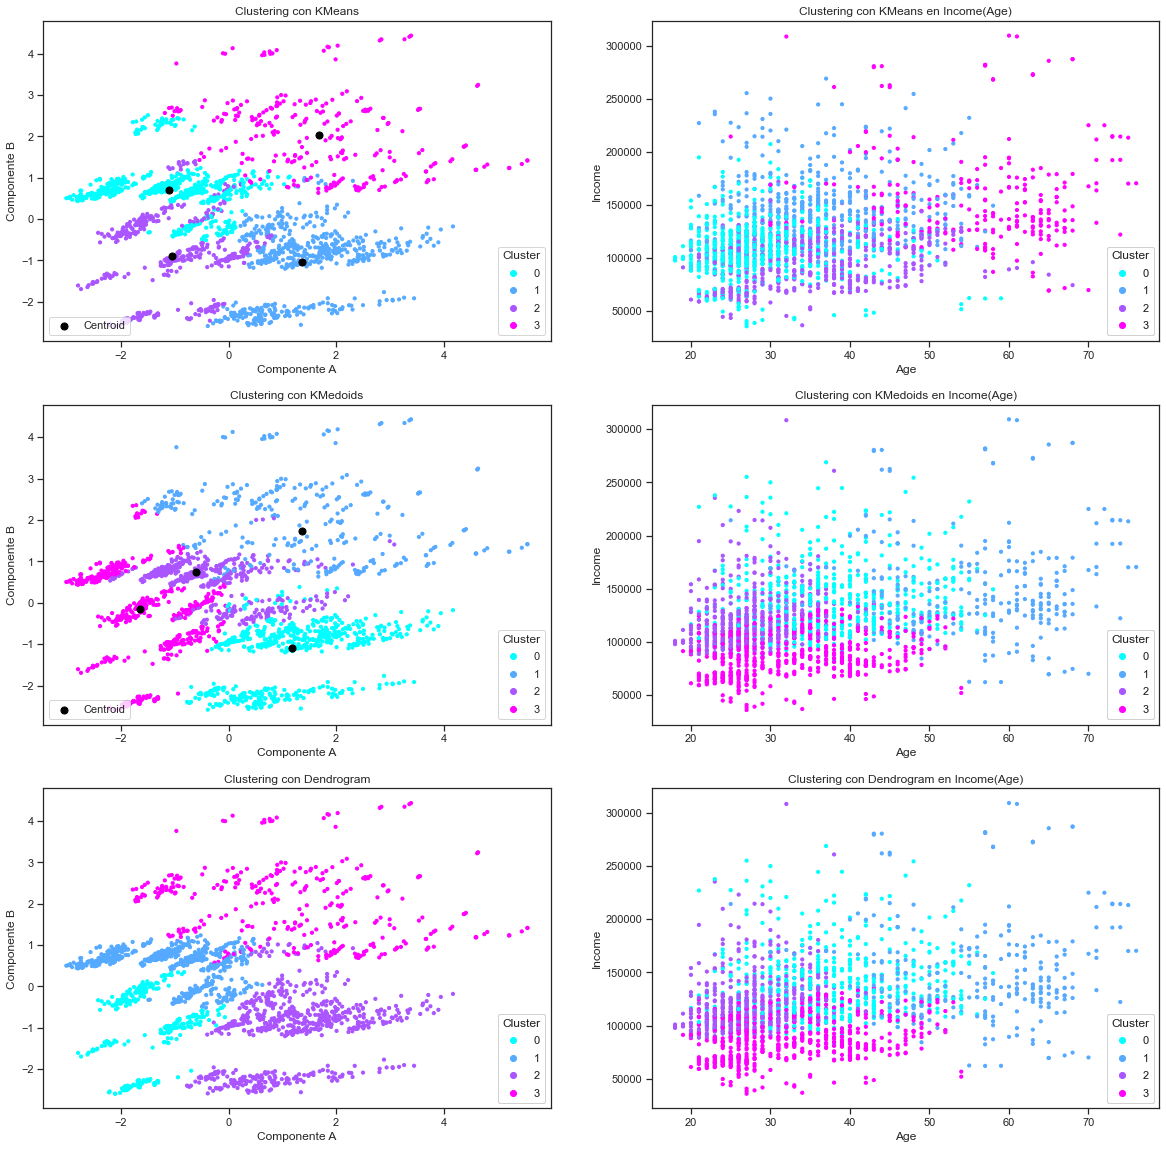

In [201]:
#Para hacer una representación 2D necesitariamos elegir 2 componentes.
#Los componentes que más explican la varianza son las dos primeros (componente_A y componente_B).

########################### KMeans #############################################################################################
color1 = df_full["KMeans"]
fig, [[ax1,ax2],[ax3,ax4],[ax5,ax6]] = plt.subplots(3,2)
fig.set_size_inches(20,20)
scatter = ax1.scatter(df_full["componente_A"], df_full["componente_B"], c = color1, cmap = "cool", s = 10)
ax1.scatter(Km.cluster_centers_[:,0], Km.cluster_centers_[:,1], s=50, c = "black", label = "Centroid")
ax1.set_xlabel("Componente A")
ax1.set_ylabel("Componente B")
legend1 = ax1.legend(*scatter.legend_elements(),
                    loc="lower right", title="Cluster")
ax1.add_artist(legend1)
ax1.legend(loc = "lower left")
ax1.set_title("Clustering con KMeans")

#Representación Age-Income
scatter = ax2.scatter(df_full["Age"], df_full["Income"], c = color1, cmap = "cool", s = 10)
ax2.set_xlabel("Age")
ax2.set_ylabel("Income")
legend2 = ax2.legend(*scatter.legend_elements(),
                    loc="lower right", title="Cluster")
ax2.add_artist(legend2)
ax2.set_title("Clustering con KMeans en Income(Age)")

############################### KMedoids ######################################################################################
color2 = df_full["KMedoids"]
scatter = ax3.scatter(df_full["componente_A"], df_full["componente_B"], c = color2, cmap = "cool", s = 10)
scatter2 = ax3.scatter(kmed.centers_[:,0], kmed.centers_[:,1], s=50, c = "black", label = "Centroid")
ax3.set_xlabel("Componente A")
ax3.set_ylabel("Componente B")
legend3 = ax3.legend(*scatter.legend_elements(),
                    loc="lower right", title="Cluster")
ax3.add_artist(legend3)
ax3.legend(loc= "lower left")
ax3.set_title("Clustering con KMedoids")

#Representación Age-Income
scatter = ax4.scatter(df_full["Age"], df_full["Income"], c = color2, cmap = "cool", s = 10)
ax4.set_xlabel("Age")
ax4.set_ylabel("Income")
legend4 = ax4.legend(*scatter.legend_elements(),
                    loc="lower right", title="Cluster")
ax4.add_artist(legend4)
ax4.set_title("Clustering con KMedoids en Income(Age)")

############################### Dendrogram #####################################################################################
color3 = df_full["Dendrogram"]
scatter = ax5.scatter(df_full["componente_A"], df_full["componente_B"], c = color3, cmap = "cool", s = 10)
ax5.set_xlabel("Componente A")
ax5.set_ylabel("Componente B")
legend5 = ax5.legend(*scatter.legend_elements(),
                    loc="lower right", title="Cluster")
ax5.add_artist(legend5)
ax5.set_title("Clustering con Dendrogram")

#Representación Age-Income
scatter = ax6.scatter(df_full["Age"], df_full["Income"], c = color2, cmap = "cool", s = 10)
ax6.set_xlabel("Age")
ax6.set_ylabel("Income")
legend6 = ax6.legend(*scatter.legend_elements(),
                    loc="lower right", title="Cluster")
ax6.add_artist(legend6)
ax6.set_title("Clustering con Dendrogram en Income(Age)")

podemos observar como cada uno tiene un comportamiento similar pero diferente.
El clustering ideal irá en base al contexto y data science que este trabajando.

By: 
Nahuel Cedrés Torres
https://www.linkedin.com/in/nahuel-cedr%C3%A9s/
